# Concentrated Risk vs Equally Distributed Risk over time
Suppose there exists a portfolio that returns 5% of return for 16% annual volatility.

Now what would this portfolio look like every day?
On average, it would return 2bps of return with 1% standard deviation for a given day.

Consider using 16x leverage to get 0.32% of return with 16% of volatility per day.

Comparing numerically, we see that the latter gives a worse return per risk profile than the former, so we conclude that it is much advantageous for an investor to allocate risk equally over a long period of time, given return per risk generating capability scales with linearly with risk.

What this simulation strives to answer is, **If we extend the time period for the latter case to match that of the former case, on average, will the investor in the latter case be worse off or better off?**

Inferring from our previous conclusion, we would answer that of course the hypothetical investor would be worse off. We see whether simulation results are consistent with our intuition.

In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [19]:
# After adding file path using sys.path.append, import script
from SDE import simulate_gbm

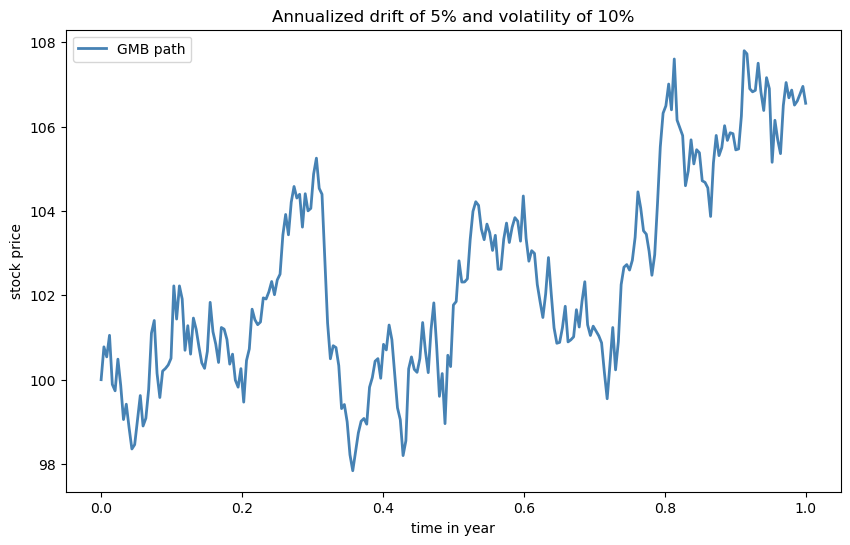

In [27]:
time_index, stock_price = simulate_gbm(S0 = 100, mu = 0.05, sigma = 0.1, delta = 1/252, t = 1, vectorized = True)

time_index = np.insert(time_index, 0, 0) # had to insert zero because of bug?

plt.figure(figsize = (10,6))
plt.plot(time_index, stock_price, "steelblue", label = "GMB path",
     linewidth=2)
plt.title("Annualized drift of 5% and volatility of 10%")
plt.xlabel("time in year")
plt.ylabel("stock price")
plt.legend()
plt.show()

In [44]:
start_date = "2023-01-01"
dates = pd.date_range(start_date, periods = 252, freq = "B")
log_ret = np.diff(np.log(stock_price))
simple_ret = np.exp(log_ret) - 1
df = pd.DataFrame({ 
  "Date": dates,
  "Price": stock_price[1:],
  "log_return": log_ret,
  "simple_return": simple_ret
}
)
print(df)

          Date       Price  log_return  simple_return
0   2023-01-02  100.778433    0.007754       0.007784
1   2023-01-03  100.540957   -0.002359      -0.002356
2   2023-01-04  101.052224    0.005072       0.005085
3   2023-01-05   99.887941   -0.011588      -0.011522
4   2023-01-06   99.736237   -0.001520      -0.001519
..         ...         ...         ...            ...
247 2023-12-13  106.511290   -0.003334      -0.003329
248 2023-12-14  106.608811    0.000915       0.000916
249 2023-12-15  106.776605    0.001573       0.001574
250 2023-12-18  106.955218    0.001671       0.001673
251 2023-12-19  106.554867   -0.003750      -0.003743

[252 rows x 4 columns]
